In [239]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [240]:
df = pd.read_csv("1-studyhours.csv")

In [241]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 656.0 bytes


In [243]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


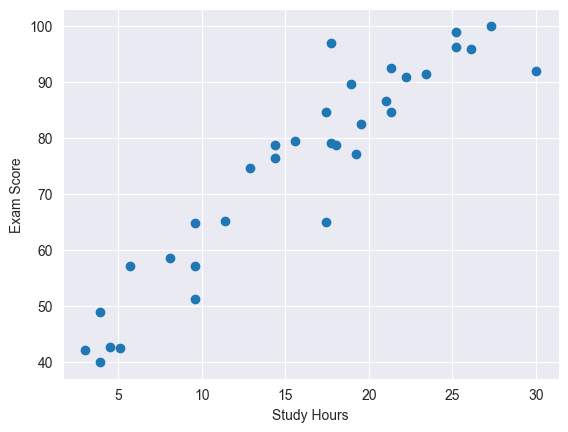

In [244]:
plt.scatter(df["Study Hours"], df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()


In [245]:
# independent and dependent features
X = df[["Study Hours"]]
y = df["Exam Score"]

In [246]:
type(X)

pandas.core.frame.DataFrame

In [247]:
type(y)

pandas.core.series.Series

In [248]:
# Test - Train Split
from sklearn.model_selection import train_test_split

In [249]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state=15)

In [250]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [251]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [252]:
# Standardize the Data set for
# Balanced Feature Values
# Efficient Gradient Descent
# l1, l2
from sklearn.preprocessing import StandardScaler

In [253]:
scaler = StandardScaler()

In [254]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [255]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [256]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [257]:
print("Coefficent: ",lr.coef_,"Intercept: ",lr.intercept_)

Coefficent:  [16.17860223] Intercept:  76.9076923076923


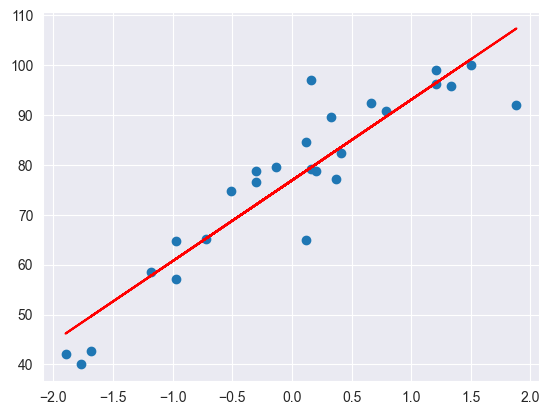

In [258]:
plt.scatter(X_train,y_train)
plt.plot(X_train, lr.predict(X_train), "r")

In [259]:
# x = 20? y = ?
lr.predict(scaler.transform([[20]]))

c:\Users\baris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [260]:
# Prediction with test data
y_pred_test = lr.predict(X_test)
y_pred_test

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

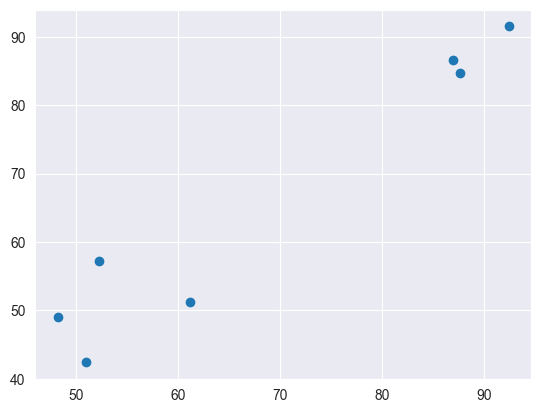

In [261]:
plt.scatter(y_pred_test,y_test)
plt.show()

In [262]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)


mse:  29.45839048833392
mae:  4.054868128856142
rmse:  5.427558427906043


In [ ]:
# R2
r2 = r2_score(y_test,y_pred_test)
print("r2 score: ",r2)

r2 score:  0.9196596206825491


In [265]:
# R2 adjusted
r2adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
r2adj

0.903591544819059